In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [2]:
url = "https://www.themoscowtimes.com/"

#News:
response = requests.get(url+"news")
soup = BeautifulSoup(response.text, "html.parser")
titles_container = soup.findAll('h3', {'class': 'article-excerpt-default__headline'})

titles_info = [title.text for title in titles_container]

In [3]:
#News+Opinion:
response = requests.get(url+"opinion")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [4]:
#News+Opinion+Business:
response = requests.get(url+"business")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [5]:
#News+Opinion+Business+ArtAndLife:
response = requests.get(url+"arts-and-life")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [6]:
#News+Opinion+Business+ArtAndLife+Meanwhile:
response = requests.get(url+"meanwhile")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [7]:
#Clean punctuation:
def replace_punctuation (text, replace):
      return re.sub("[%s]" % re.escape(string.punctuation), replace, text)

titles_info = replace_punctuation(str(titles_info), "")

#Clean other chars:
titles_info = titles_info.replace("’", "").replace("‘", "").replace("'", "").replace("\n","").replace("\t","").replace("\\ ", "").replace("–", "")

#Lower case:
titles_info = titles_info.lower()

print(titles_info)

russia will restrict lake baikal tourism putin aide says russian senate rules to leave nuclear arms treaty in unanimous vote russia to pay kazakhstan compensation for contaminated oil in crisis breakthrough russia says plane to venezuela carried military specialists russia shows off new military technology at 2019 army forum in photos 1 in 10 russians have been tortured by authorities  poll russian arctic island becomes nature reserve russia is laying groundwork for georgian wine ban media reports russia will respond to any nato steps over missiles minister says russians are increasingly protesting social not political issues  study baptized russian soldiers won wwii while atheists died orthodox bishop says police catch drugging robbing spree suspect in central moscow two russian biathletes get fouryear bans for doping nato calls on russia to destroy new missile warns of response russia sentences polish national to 14 years for espionage downed us drone was in iranian airspace putins a

In [8]:
#Token list:
words = nltk.tokenize.word_tokenize(titles_info)

#Stopwords list:
stopwords = nltk.corpus.stopwords.words("english")

#Token list - stopwords:
words_without_stopwords = list(filter(lambda word: word not in stopwords, words))

#FreqDist:
words_except_stop_dist = nltk.FreqDist(words_without_stopwords)

words_without_stopwords

['russia',
 'restrict',
 'lake',
 'baikal',
 'tourism',
 'putin',
 'aide',
 'says',
 'russian',
 'senate',
 'rules',
 'leave',
 'nuclear',
 'arms',
 'treaty',
 'unanimous',
 'vote',
 'russia',
 'pay',
 'kazakhstan',
 'compensation',
 'contaminated',
 'oil',
 'crisis',
 'breakthrough',
 'russia',
 'says',
 'plane',
 'venezuela',
 'carried',
 'military',
 'specialists',
 'russia',
 'shows',
 'new',
 'military',
 'technology',
 '2019',
 'army',
 'forum',
 'photos',
 '1',
 '10',
 'russians',
 'tortured',
 'authorities',
 'poll',
 'russian',
 'arctic',
 'island',
 'becomes',
 'nature',
 'reserve',
 'russia',
 'laying',
 'groundwork',
 'georgian',
 'wine',
 'ban',
 'media',
 'reports',
 'russia',
 'respond',
 'nato',
 'steps',
 'missiles',
 'minister',
 'says',
 'russians',
 'increasingly',
 'protesting',
 'social',
 'political',
 'issues',
 'study',
 'baptized',
 'russian',
 'soldiers',
 'wwii',
 'atheists',
 'died',
 'orthodox',
 'bishop',
 'says',
 'police',
 'catch',
 'drugging',
 'robbi

Top 10 frequencies, excluding stopwords:
---------------------------------------------
      Value  Frequency
0    russia         46
1      says         30
2   russian         20
3      aide         10
4  military         10
5       new         10
6  russians         10
7      nato         10
8  restrict          5
9      lake          5
---------------------------------------------


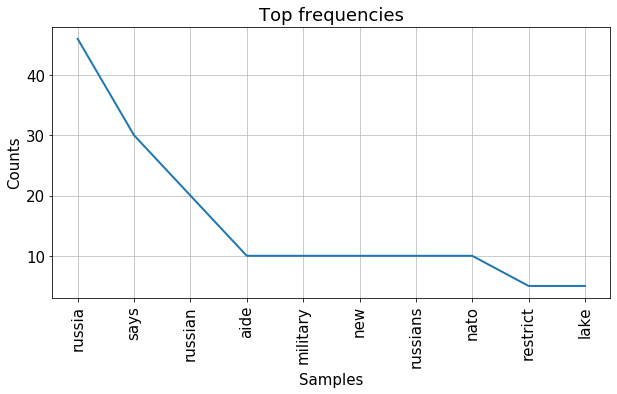

In [9]:
#Results:
def print_df_and_graph_of_freqdist(top, freqdist):
    #df:
    print("Top", top, "frequencies, excluding stopwords:")
    print("-" * 45)
    print(pd.DataFrame(freqdist.most_common(top), columns = ["Value", "Frequency"]))
    print("-" * 45)
     #graph:   
    plt.figure(figsize=(10,5)) #Change graph size
    plt.rcParams.update({'font.size': 15}) #Change text size
    freqdist.plot(top, title = "Top frequencies")

print_df_and_graph_of_freqdist(10, words_except_stop_dist)

In [10]:
#Word tags: https://www.sketchengine.eu/penn-treebank-tagset/
word_tags = nltk.pos_tag(words_without_stopwords) #Return list
word_tags = pd.DataFrame(word_tags, columns = ["Word", "Tag"])

word_tags.head(20)

,Word,Tag
0,russia,NN
1,restrict,NN
2,lake,NN
3,baikal,JJ
4,tourism,NN
5,putin,NN
6,aide,NN
7,says,VBZ
8,russian,JJ
9,senate,NN


In [11]:
#Delete verbs:
def delete_tag_in_df(df, column, tag): #Starts with! No generic!
    df.drop(df[df[column].str.startswith(tag)].index.tolist(), inplace = True)
    
#Delete "russia", "russian"...:
def delete_family_in_df(df, column, family):
    df.drop(df[df[column].str.startswith(family)].index.tolist(), inplace = True)
    
delete_tag_in_df(word_tags, "Tag" , "VB")
#delete_tag_in_df(word_tags, "Tag" , "JJ")
delete_tag_in_df(word_tags, "Tag", "CD")
delete_tag_in_df(word_tags, "Word" , "russia")

Top 10 frequencies, excluding stopwords:
---------------------------------------------
      Value  Frequency
0  military         10
1       new         10
2      nato         10
3  restrict          5
4      lake          5
5    baikal          5
6   tourism          5
7     putin          5
8      aide          5
9    senate          5
---------------------------------------------


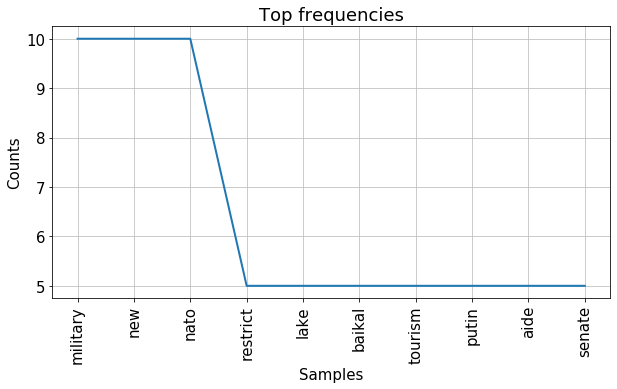

In [12]:
#FreqDist without verbs and "russia" family:
final_words_list = word_tags["Word"].values.tolist()
final_words = nltk.FreqDist(final_words_list)

#Results:
print_df_and_graph_of_freqdist(10, final_words)

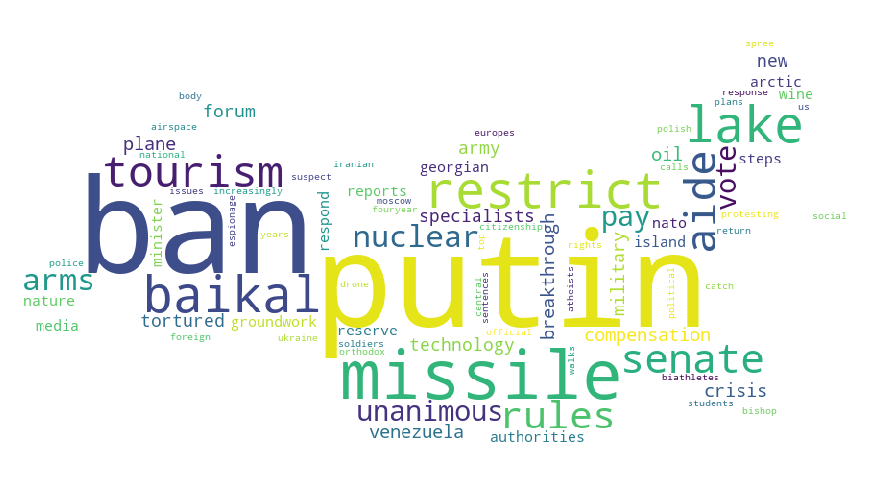

In [13]:
#Wordcloud graph: https://blog.goodaudience.com/how-to-generate-a-word-cloud-of-any-shape-in-python-7bce27a55f6e
def generate_wordcloud(str_, mask_):
    word_cloud = WordCloud(width = 1000, height = 1000, background_color = "white", mask = mask_).generate(str_)
    plt.figure(figsize = (12, 12),facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

mask = np.array(Image.open(requests.get("https://banner2.kisspng.com/20180703/vlx/kisspng-russian-revolution-blank-map-clip-art-map-russia-5b3c150076f918.4360855015306641924873.jpg", stream = True).raw))
str_ = ",".join(final_words)

generate_wordcloud(str_, mask)